# 결정트리(Decision Tree)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11
)

In [3]:
dtc = DecisionTreeClassifier(random_state=156)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, out_file='tree.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)

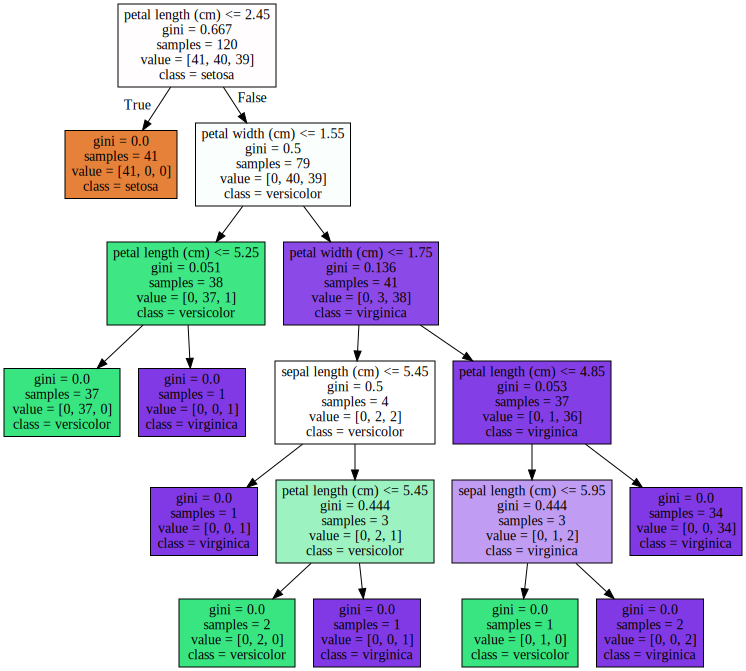

In [10]:
import graphviz

with open('tree.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

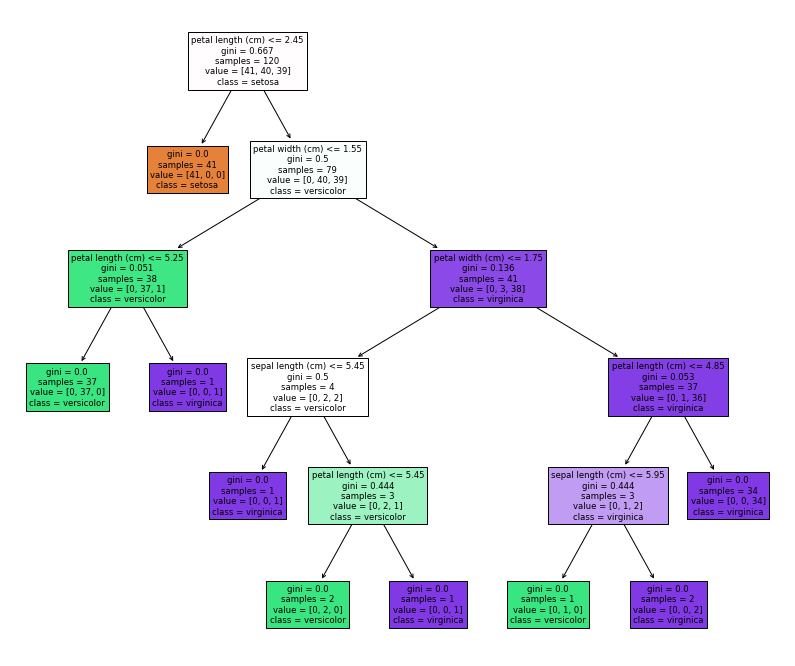

In [15]:
plt.figure(figsize=(14, 12))
plot_tree(dtc, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

## 제약조건
- max_depth = 3

In [16]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
export_graphviz(
    dtc2, out_file='tree2.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)

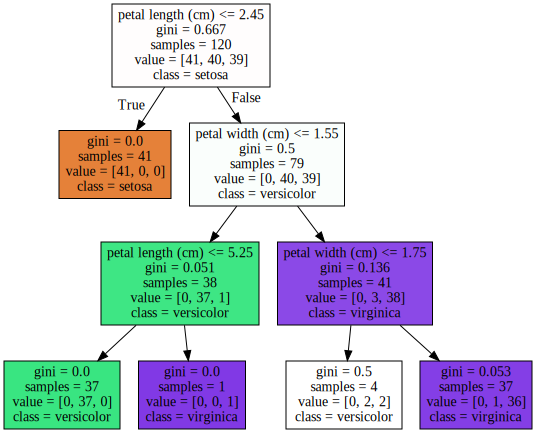

In [19]:
with open('tree2.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

- min_samples_split=4

In [33]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

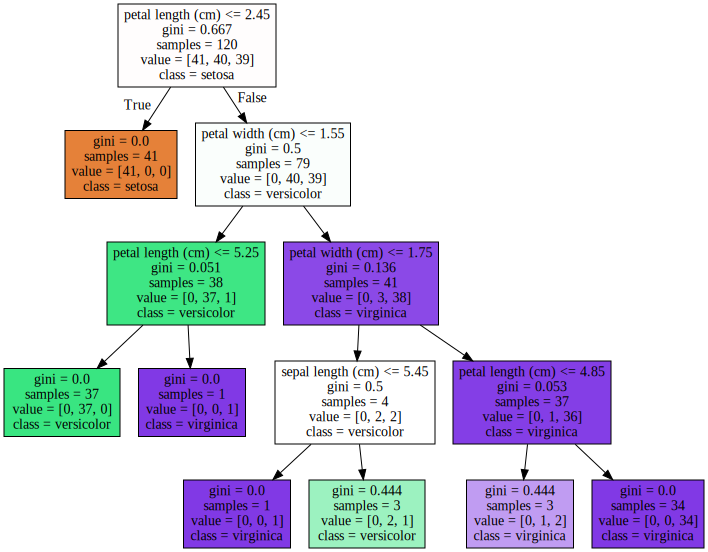

In [20]:
dtc3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dtc3.fit(X_train, y_train)
export_graphviz(
    dtc3, out_file='tree3.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)
with open('tree3.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

- min_samples_leaf=2

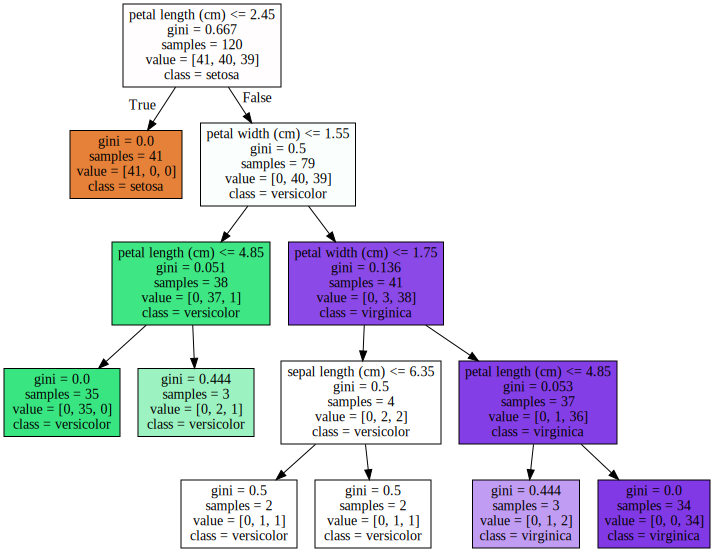

In [21]:
dtc4 = DecisionTreeClassifier(min_samples_leaf=2, random_state=156)
dtc4.fit(X_train, y_train)
export_graphviz(
    dtc4, out_file='tree4.dot',
    feature_names=iris.feature_names, class_names=iris.target_names,
    impurity=True, filled=True
)
with open('tree4.dot') as file:
    dot_graph = file.read()
graphviz.Source(dot_graph)

- 모델 비교

In [24]:
dtc.score(X_test, y_test), dtc2.score(X_test, y_test),dtc3.score(X_test, y_test), dtc4.score(X_test, y_test)

(0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333)

## 학습된 모델이 제공하는 정보

In [25]:
dtc.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [26]:
dtc2.feature_importances_

array([0.        , 0.        , 0.55810743, 0.44189257])

In [31]:
import seaborn as sns
# sns.barplot(x=dtc.feature_importances_, y=iris.feature_names)
# plt.show()

ImportError: cannot import name 'rng_integers' from 'scipy._lib._util' (C:\Users\min\Anaconda3\lib\site-packages\scipy\_lib\_util.py)